In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt

In [31]:
df = data

In [30]:
data = pd.read_excel("innercity.xlsx")
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


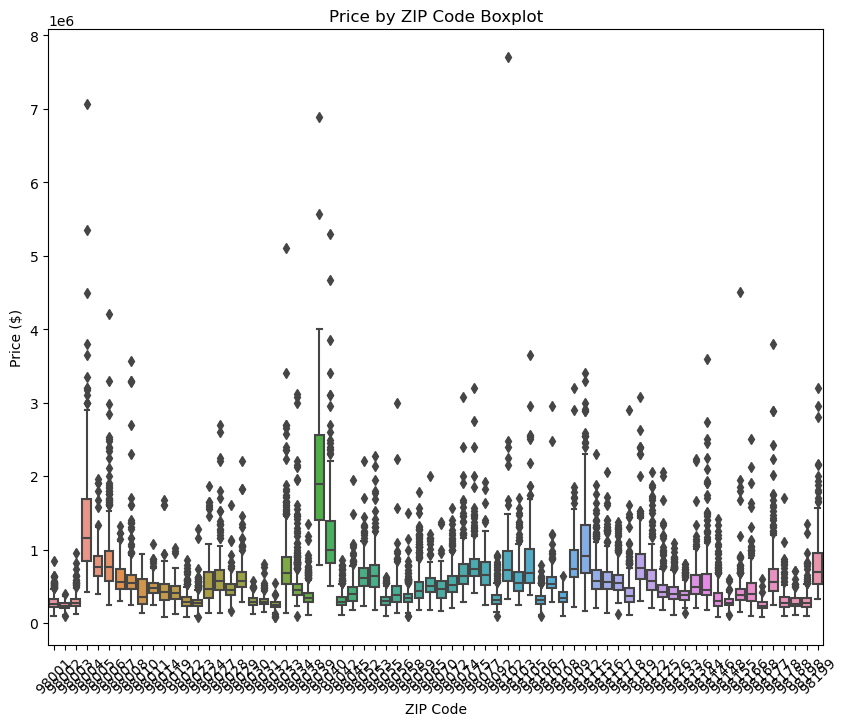

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='zipcode', y='price', data=data)
plt.title('Price by ZIP Code Boxplot')
plt.xlabel('ZIP Code')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

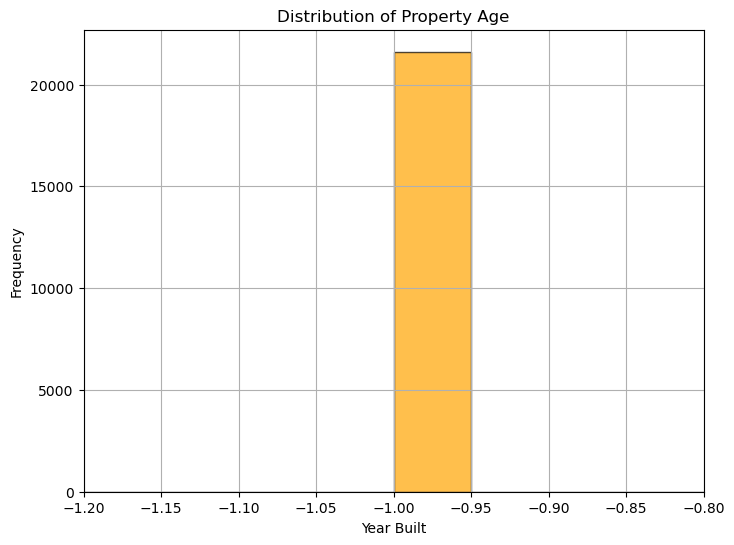

In [25]:
data['yr_built'] = data['yr_built'].str.replace(r'\D', '', regex=True)
data['yr_built'] = pd.to_numeric(data['yr_built'], errors='coerce').fillna(-1)
property_year = data['yr_built'].astype(int)
plt.figure(figsize=(8, 6))
plt.hist(property_year, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Property Age')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.xlim(-1.2, -0.8)
plt.grid(True)
plt.show()

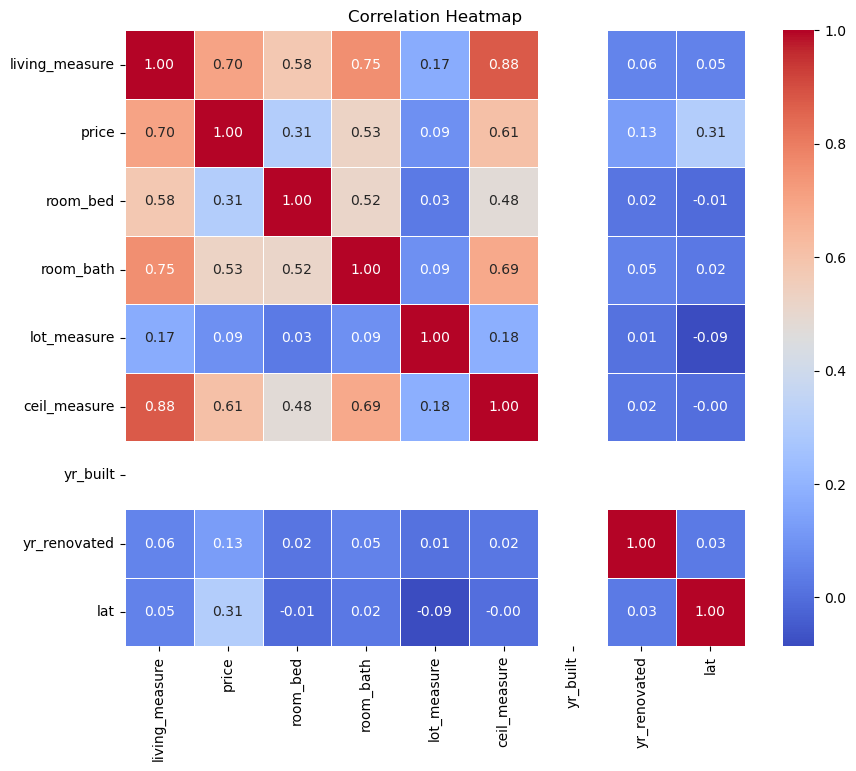

In [26]:
numerical_columns = ['living_measure', 'price', 'room_bed', 'room_bath', 'lot_measure', 'ceil_measure', 'coast', 'yr_built', 'yr_renovated', 'lat', 'long', 'total_area']

corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
df_numeric = data.apply(pd.to_numeric, errors='coerce')

df_numeric.dropna(inplace=True)
X = df_numeric[['living_measure', 'price', 'room_bed', 'room_bath', 'lot_measure', 'ceil_measure', 'coast', 'yr_built', 'yr_renovated', 'lat', 'long', 'total_area']]
y = df_numeric['price']

num_samples = len(X)
test_size = 0.2  # Specify your desired test size here

if num_samples == 0:
    print("Error: Dataset is empty.")
elif num_samples <= 1 / test_size:
    print("Error: Test size is too large relative to the dataset size.")
else:
    # Splitting the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model training
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Model evaluation
    lr_predictions = lr.predict(X_test)
    mse = mean_squared_error(y_test, lr_predictions)
    mae = mean_absolute_error(y_test, lr_predictions)
    r2 = r2_score(y_test, lr_predictions)

    print("Linear Regression Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

    # Visualizing actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, lr_predictions, alpha=0.5)
    plt.title('Actual vs. Predicted Prices (Linear Regression)')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)
    plt.show()

Error: Dataset is empty.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset with specified encoding
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('your_dataset.csv', encoding='latin1')

# Check if the dataset is empty
if df.empty:
    print("Error: Dataset is empty.")
else:
    # Assuming 'X' contains the features and 'y' contains the target variable (price)
    X = df[['living measure', 'room bed', 'room bath', 'Lot measure', 'ceil measure', 'coast', 'year built', 'year renovated', 'latitude', 'longitude', 'total area']]
    y = df['price']

    # Splitting the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Model evaluation
    lr_predictions = lr.predict(X_test)
    mse = mean_squared_error(y_test, lr_predictions)
    mae = mean_absolute_error(y_test, lr_predictions)
    r2 = r2_score(y_test, lr_predictions)

    print("Linear Regression Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

    # Visualizing actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, lr_predictions, alpha=0.5)
    plt.title('Actual vs. Predicted Prices (Linear Regression)')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

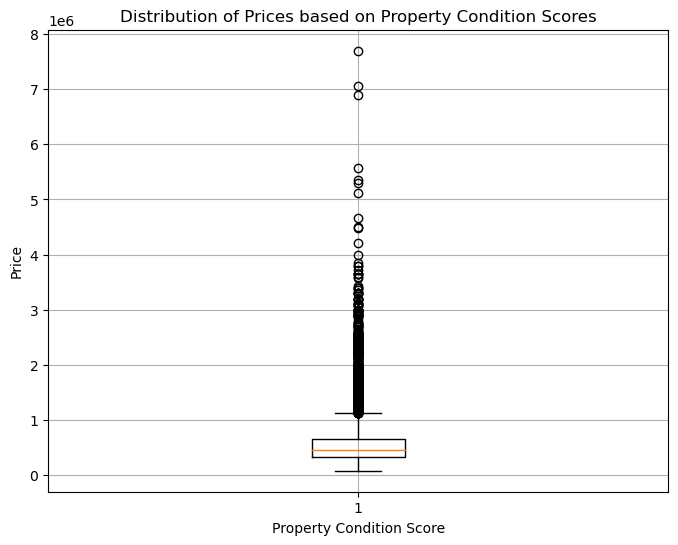

In [33]:
property_conditions = df['condition']
prices = df['price']

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(prices)
plt.title('Distribution of Prices based on Property Condition Scores')
plt.xlabel('Property Condition Score')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
property_conditions = df['condition']
prices = df['price']

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(prices)
plt.title('Distribution of Prices based on Property Condition Scores')
plt.xlabel('Property Condition Score')
plt.ylabel('Price')
# plt.xticks(range(1, len(property_conditions) + 1), property_conditions)  # Set x-axis labels
plt.grid(True)
plt.show()


In [ ]:
property_conditions_scores = df['condition']
property_prices = df['price']
data = {'Property Condition Score': property_conditions_scores, 'Price ($)': property_prices}
df = pd.DataFrame(data)

average_prices = df.groupby('Property Condition Score')['Price ($)'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Property Condition Score', y='Price ($)', data=average_prices, palette='Set2')
plt.title('Average Property Prices by Condition Score')
plt.xlabel('Property Condition Score')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()
